In [66]:
from IPython.display import display, HTML

display(
    HTML("""
<style>
* {font-family:D2Coding;}
div.container{width:87% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input { font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:3px;}
table.dataframe{font-size:12px;}
</style>
"""))

In [67]:
# import
import numpy as np
import seaborn as sns # iris 데이터
import pandas as pd # 원핫 인코팅
from sklearn.preprocessing import LabelEncoder # 라벨인코딩(문자 → 숫자)
from tensorflow.keras.utils import to_categorical # 원핫인코딩
from sklearn.model_selection import train_test_split # 데이터 분할(층화추출로)
from tensorflow.keras.models import Sequential, load_model, save_model
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt # 학습과정 시각화




In [68]:
# 데이터 생성 및 전처리 (라벨인토딩만 하고, 원핫인코딩X)

In [69]:
from sklearn import datasets
iris = datasets.load_iris()
# iris
# iris.keys()
iris_X = iris.data
iris_y = iris.target
# iris_X.shape, iris_y.shape
# iris_y

train_X, test_X, train_y, test_y = train_test_split(iris_X, iris_y, test_size=0.1, stratify=iris_y, random_state=4)
train_X.shape, test_X.shape, train_y.shape, test_y .shape


((135, 4), (15, 4), (135,), (15,))

# 1. 기본적인 DNN (원핫인코딩 X)


In [70]:
# 모델 설정
# model = Sequential()

# model.add(Input(4,))
# model.add(Dense(units=50, activation='relu'))
# model.add(Dense(units=30, activation='relu'))
# model.add(Dense(units=3, activation='softmax'))

model = Sequential([
    Input(4,),
    Dense(units=50, activation='relu'),
    Dense(units=30, activation='relu'),
    Dense(units=3, activation='softmax'),

])

model.summary() # 250+1530+93 = 1873개 파라미터

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 50)                250       
                                                                 
 dense_31 (Dense)            (None, 30)                1530      
                                                                 
 dense_32 (Dense)            (None, 3)                 93        
                                                                 
Total params: 1,873
Trainable params: 1,873
Non-trainable params: 0
_________________________________________________________________


In [71]:
# 학습설정
model.compile(loss='sparse_categorical_crossentropy', #라벨인코딩만 되어 있는 경우
              optimizer='adam',
              metrics=['accuracy']
              )

# 학습
earlyStopping = EarlyStopping(patience=50) # monitor='val_loss' 기본값

hist = model.fit(train_X, train_y, 
                 epochs=5000, 
                 validation_split=0.2, 
                 callbacks=[earlyStopping])

Epoch 1/5000
4/4 [==============================] - 1s 77ms/step - loss: 1.4341 - accuracy: 0.3611 - val_loss: 1.2528 - val_accuracy: 0.6667
Epoch 2/5000
4/4 [==============================] - 0s 13ms/step - loss: 1.1618 - accuracy: 0.6574 - val_loss: 1.0314 - val_accuracy: 0.7037
Epoch 3/5000
4/4 [==============================] - 0s 14ms/step - loss: 1.0122 - accuracy: 0.6574 - val_loss: 0.9306 - val_accuracy: 0.7037
Epoch 4/5000
4/4 [==============================] - 0s 14ms/step - loss: 0.9256 - accuracy: 0.7222 - val_loss: 0.8916 - val_accuracy: 0.5185
Epoch 5/5000
4/4 [==============================] - 0s 13ms/step - loss: 0.8782 - accuracy: 0.6759 - val_loss: 0.8717 - val_accuracy: 0.5185
Epoch 6/5000
4/4 [==============================] - 0s 13ms/step - loss: 0.8343 - accuracy: 0.6667 - val_loss: 0.8426 - val_accuracy: 0.4444
Epoch 7/5000
4/4 [==============================] - 0s 13ms/step - loss: 0.7913 - accuracy: 0.6019 - val_loss: 0.8053 - val_accuracy: 0.4815
Epoch 8/5000


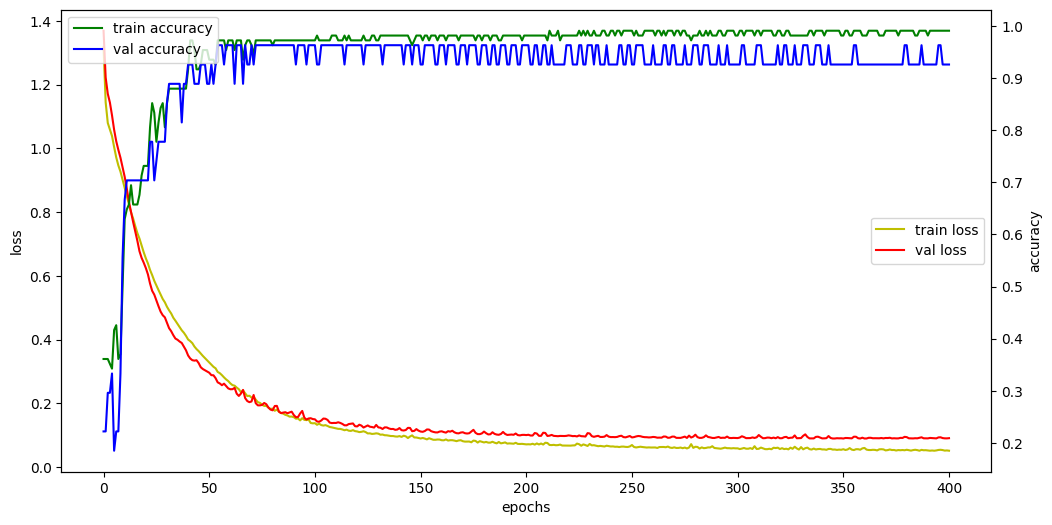

In [27]:
# 5. 모델 학급과정 시각화
fig, loss_ax = plt.subplots(figsize=(12,6))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accuracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(loc='upper left')
plt.show()

# 2. sklearn 이용

- 원핫인코딩을 하지 않고, 라벨인코딩까지만 해야 작동, numpy배열만...

In [ ]:
from sklearn.neural_network import MLPClassifier

In [36]:
# 머신러닝 3장 교안 43page 참고

mlp_model = MLPClassifier(hidden_layer_sizes=(50,30), 
                      activation='relu', 
                      solver='adam',
                      alpha=0.0001, # 과적합 방지 강도
                      batch_size=40,
                      max_iter=1000, # epoch
                      early_stopping=True, # 조기종료 활성화 (val_loss)
                      n_iter_no_change=50, # patience
                      warm_start=False, # True일 경우 이전학습에 이어서 학습
                      validation_fraction=0.1, # 검증셋 비율
                      )

In [37]:
mlp_model.fit(train_X, train_y)

MLPClassifier(batch_size=40, early_stopping=True, hidden_layer_sizes=(50, 30),
              max_iter=1000, n_iter_no_change=50)

In [47]:
# 모델 평가 : accuracy(test_X, test_y), recall, precision (test_Y, yhat)
from sklearn.metrics import recall_score, precision_score
accuracy = mlp_model.score(test_X, test_y)
yhat = mlp_model.predict(test_X)
yhat

recall = recall_score(test_y, yhat, average='weighted')
precision = recall_score(test_y, yhat, average="weighted")

print('정확도 :', accuracy)
print('재현율 :', recall)
print('정밀도 :', precision)
print('교차표\n', pd.crosstab(test_y, yhat, 
                             rownames=['실제'], 
                             colnames=['예측']))

정확도 : 0.9333333333333333
재현율 : 0.9333333333333333
정밀도 : 0.9333333333333333
교차표
 예측  0  1  2
실제         
0   5  0  0
1   0  4  1
2   0  0  5


# 3. 클래스 이용

In [63]:
class DNNClassifier:
    @staticmethod
    def build(input_dim=4, activation='relu'):
        # model = Sequential()

        # model.add(Input(input_dim,))
        # model.add(Dense(50, activation=activation))
        # model.add(Dense(30, activation=activation))
        # model.add(Dense(3, activation='softmax'))
        
        model = Sequential([
            Input(input_dim),
            Dense(50, activation=activation),
            Dense(30, activation=activation),
            Dense(3, activation='softmax')
        ])

        # 학습설정
        model.compile(loss='sparse_categorical_crossentropy', 
                      optimizer='adam', 
                      metrics=['accuracy'])

        return model



In [64]:
# 모델
model = DNNClassifier.build(input_dim=4, activation='relu')
model.summary()


# 모델학습
hist = model.fit(train_X, train_y, 
                 epochs=500, 
                 validation_split=0.2, 
                 verbose=1)


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 50)                250       
                                                                 
 dense_28 (Dense)            (None, 30)                1530      
                                                                 
 dense_29 (Dense)            (None, 3)                 93        
                                                                 
Total params: 1,873
Trainable params: 1,873
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
4/4 [==============================] - 1s 108ms/step - loss: 1.3028 - accuracy: 0.3333 - val_loss: 1.2073 - val_accuracy: 0.2222
Epoch 2/500
4/4 [==============================] - 0s 41ms/step - loss: 1.1455 - accuracy: 0.3704 - val_loss: 1.0925 - val_accuracy: 0.2593
Epoch 3/500
4/4 [==================

In [65]:
loss, accurary = model.evaluate(test_X, test_y)

loss, accurary

1/1 [==============================] - 0s 29ms/step - loss: 0.0204 - accuracy: 1.0000


(0.020366834476590157, 1.0)

# 4. 함수형 API 이용하기

- 병렬처리 : 속도 높이려고
- 레지듀얼블록(Residual block) : 모델의 성능을 높이려고(자연어 처리, 이미지 처러)

In [ ]:
# import
import numpy as np
from sklearn.preprocessing import LabelEncoder # 라벨인코딩(문자 → 숫자)
from tensorflow.keras.utils import to_categorical # 원핫인코딩
from sklearn.model_selection import train_test_split # 데이터 분할(층화추출로)
from tensorflow.keras import Model # 모델 생성 (입력층과 출력층을 이용)
from tensorflow.keras.layers import Dense, Input, add # add 레지듀얼 블록에서 사용
from tensorflow.keras.layers import concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt # 학습과정 시각화

In [74]:
from sklearn import datasets
iris = datasets.load_iris()
# iris
# iris.keys()
iris_X = iris.data
iris_y = iris.target
# iris_X.shape, iris_y.shape
# iris_y

train_X, test_X, train_y, test_y = train_test_split(iris_X, iris_y, test_size=0.1, stratify=iris_y, random_state=4)
train_X.shape, test_X.shape, train_y.shape, test_y .shape

((135, 4), (15, 4), (135,), (15,))